<a href="https://colab.research.google.com/github/taeheonkwon/Error_python_programming/blob/main/model_summary_error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
from tensorflow import keras

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=300)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


아래와 같이 모델을 설정하면,

model.summary() 에서 모델이 unbuilt 되었다고 모델 파라미터를 보여 주지 않는다.

model4.add(keras.layers.Input(shape=(100,))) 를

Embedding 층 이전에 삽입하고,

임베딩층의 input_length=100 을 삭제해 준다. (중복 코딩이므로)

In [2]:
model = keras.Sequential()
model.add(keras.layers.Embedding(300, 100, input_length=100))
model.add(keras.layers.SimpleRNN(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [3]:
model4 = keras.Sequential()
model4.add(keras.layers.Input(shape=(100,))) #이 항목은 예전에는 없었다. input 되는 데이터의 shape 이 (20000, 100) 이어서, 샘플 개수를 제외하고 (100,)로 작성
model4.add(keras.layers.Embedding(300, 16))
model4.add(keras.layers.SimpleRNN(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))
model4.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 100, 16)             │           4,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 8)                   │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,009 (19.57 KB)

 Trainable params: 5,009 (19.57 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.5260 - loss: 0.6933 - val_accuracy: 0.6150 - val_loss: 0.6619
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.6467 - loss: 0.6480 - val_accuracy: 0.6542 - val_loss: 0.6330
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.6901 - loss: 0.6172 - val_accuracy: 0.6838 - val_loss: 0.6091
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.7077 - loss: 0.5936 - val_accuracy: 0.7078 - val_loss: 0.5850
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.7227 - loss: 0.5754 - val_accuracy: 0.7222 - val_loss: 0.5667
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.7311 - loss: 0.5616 - val_accuracy: 0.7252 - val_loss: 0.5572
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.7400 - loss: 0.5487 - val_accuracy: 0.7252 - val_loss: 0.5508
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.7439 - loss: 0.53

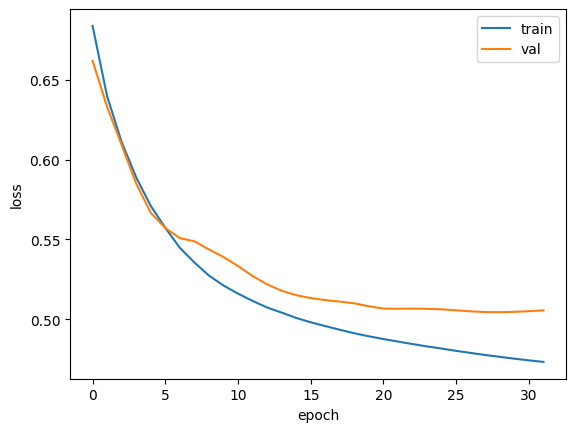

In [5]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [6]:
cp best-embedding-model.keras ./drive/MyDrive/data/best_IMDB-embedding-model.keras

아래 예제는 학습률을 크게 했을 경우, 손실함수 값이 급변하는 것을 보여 준다.

즉,

#손실함수의 증감이 매우 클 때는 학습률을 낮추는 것이 첫번째 할 일이다.

In [7]:
model2 = keras.Sequential()
model2.add(keras.layers.Input(shape=(100,))) #이 항목은 예전에는 없었다. input 되는 데이터의 shape 이 (20000, 100) 이어서, 샘플 개수를 제외하고 (100,)로 작성
model2.add(keras.layers.Embedding(300, 16))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 100, 16)             │           4,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 8)                   │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,009 (19.57 KB)

 Trainable params: 5,009 (19.57 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model2.compile(optimizer='rmsprop', loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best_IMDB_origin_Optimizer_embedding_model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.5674 - loss: 0.6776 - val_accuracy: 0.7096 - val_loss: 0.5873
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.7045 - loss: 0.5827 - val_accuracy: 0.7420 - val_loss: 0.5334
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.7211 - loss: 0.5519 - val_accuracy: 0.6664 - val_loss: 0.6334
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.7339 - loss: 0.5348 - val_accuracy: 0.7392 - val_loss: 0.5279
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.7349 - loss: 0.5332 - val_accuracy: 0.7354 - val_loss: 0.5367
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.7379 - loss: 0.5265 - val_accuracy: 0.7444 - val_loss: 0.5224
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step - accuracy: 0.7389 - loss: 0.5246 - val_accuracy: 0.7318 - val_loss: 0.5390
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.7395 - loss: 0.5

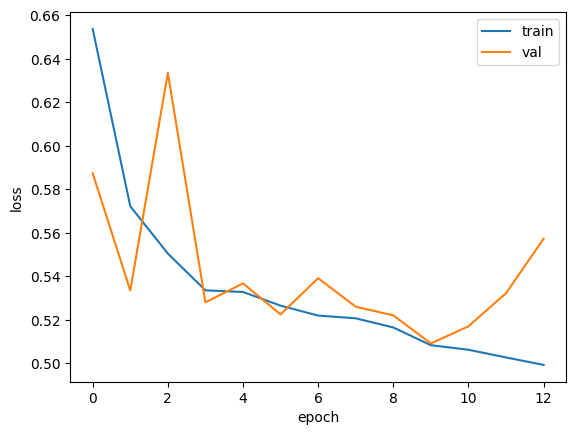

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()